C:\Users\pmall\AppData\Local\Temp\ipykernel_14000\328403844.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vote_review_time = data.groupby('vote_bins')['review_age_days'].mean().reset_index(name='average_review_age_days')


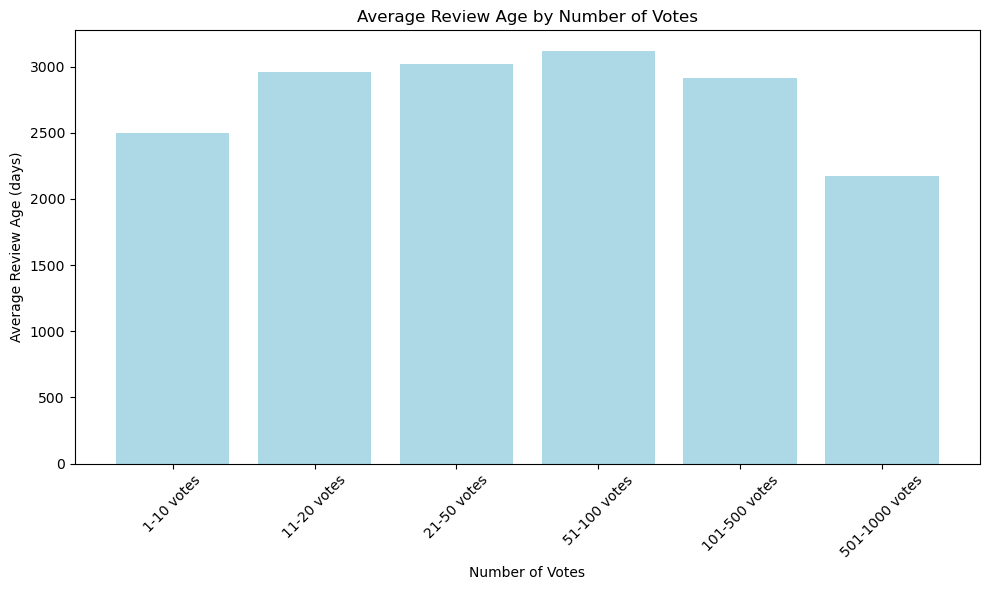

In [1]:
#  Number of votes vs review time

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Load your JSON file
data = pd.read_json('C:/USD/ms-aai-501-final-project/data/Software_5-core.json', lines=True)

# Convert the 'vote' column to numeric, handling non-numeric values
data['vote'] = pd.to_numeric(data['vote'], errors='coerce')
data.dropna(subset=['vote'], inplace=True)

# Cast votes to integer
data['vote'] = data['vote'].astype(int)

# Convert 'reviewTime' from string to datetime format
data['reviewTime'] = pd.to_datetime(data['reviewTime'], format='%m %d, %Y')

# Calculate review time in days from the review date to the present (or to the latest date in the dataset)
latest_date = data['reviewTime'].max()
data['review_age_days'] = (latest_date - data['reviewTime']).dt.days

# Define the bins for vote counts
bins = [-1, 0, 10, 20, 50, 100, 500, 1000, np.inf]  # Adjust the bins as needed
labels = ['0 votes', '1-10 votes', '11-20 votes', '21-50 votes', '51-100 votes', '101-500 votes', '501-1000 votes', '1001+ votes']

# Bin the vote counts using pd.cut
data['vote_bins'] = pd.cut(data['vote'], bins=bins, labels=labels)

# Group by the binned vote counts and calculate the average review age for each bin
vote_review_time = data.groupby('vote_bins')['review_age_days'].mean().reset_index(name='average_review_age_days')

# Plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(vote_review_time['vote_bins'].astype(str), vote_review_time['average_review_age_days'], color='lightblue')
plt.xlabel('Number of Votes')
plt.ylabel('Average Review Age (days)')
plt.title('Average Review Age by Number of Votes')
plt.xticks(rotation=45)  # Rotate labels to improve readability

plt.tight_layout()
plt.show()